# MSE Homework 1

In [1]:
from thermostate import Q_
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pi = math.pi
e = Q_(1.602e-19, "C")
epsilon_o = Q_(8.85e-12, "F/m")

## Problem 2.16

The atomic radii of Mg$^{2+}$ and F$^-$ ions are 0.072 and 0.133 nm, respectively.

(a) Calculate the force of attraction between these two ions at their equilibrium
interionic separation (i.e., when the ions just touch one another).

(b) What is the force of repulsion at this same separation distance.

### Solution

Important equations:

1. $F=\frac{1}{4\pi \epsilon _{o} r^2} (|Z_1|e)(|Z_2|e)$

In [3]:
Z_1 = 2
Z_2 = -1
r = Q_((0.072+0.133), "nm")
F = 1/(4*pi*epsilon_o*(r)**2) * (Z_1*e)*(math.fabs(Z_2)*e)
print(round(F.to("N"),11))

1.098e-08 newton


(a) The force of attraction between the two ions is 1.098e-08 Newton

(b) At equilibirum interatonic seperation, the attractive and repulsive forces are equal and opposite therefore the repulsive force is -1.098e-08 Newton

## Problem 2.18

The net potential energy between two adjacent ions, $E_N$, may be represented by the sum of Equations 2.9 and 2.11; that is,

$$E_N = -\frac{A}{r} + \frac{B}{r^n}$$

Calculate the bonding energy $E_o$ in terms of the parameters A, B, and n using the following
procedure:

1. Differentiate $E_N$ with respect to r, and then set the resulting expression equal to zero, since the curve of $E_N$ versus r is a minimum at $E_o$.

2. Solve for r in terms of A, B, and n, which yields $r_o$, the equilibrium interionic spacing. 

3. Determine the expression for $E_o$ by substitution of $r_o$ into Equation 2.17.

### Calculation

First we will rearrange to make differentiation simpler:

${E_N}= -A r^{-1} + B r^{-n}$

Now differentiation is just a matter of power rule:

$\frac{dE_N}{dr}= A r^{-2} + -n B r^{-(n+1)}=0$

Now we set it equal to zero and rearrange the equation to get $r(A,B,n)$, also known as $r_o$, the equilbrium interionic spacing:

$\frac{A}{r^2}=\frac{nB}{r^{(n+1)}}$

$\frac{r^2}{r^{(n+1)}}=\frac{A}{nB}$

$r^2\cdot {r^{-n-1}}=\frac{A}{nB}$

$r^{1-n} =\frac{A}{nB}$

$r_o = (\frac{A}{nB})^{\frac {1}{1-n}}$

Now we can find the energy for $r_o$ also know as $E_o$:

$E_o = -\frac{A}{r_o} + \frac{B}{{r_o}^n}$

$E_o = -\frac{A}{(\frac{A}{nB})^{\frac {1}{1-n}}} + \frac{B}{(\frac{A}{nB})^{\frac {n}{1-n}}}$


## Problem 2.19

For a Na$^+$– Cl$^-$ ion pair, attractive and repulsive energies $E_A$ and $E_R$, respectively, depend on the distance between the ions r, according to

$$E_A = \frac{−1.436}{r}$$

$$E_R = \frac{7.32 × 10^{−6}}{r^8}$$

For these expressions, energies are expressed in electron volts per Na$^+$– Cl$^-$ pair, and r is the distance in nanometers. The net energy $E_N$ is just the sum of the preceding two expressions.

(a) Superimpose on a single plot $E_N$, $E_R$, and $E_A$ versus r up to 1.0 nm.

(b) On the basis of this plot, determine 

* (i) the equilibrium spacing $r_o$ between the Na$^+$ and Cl$^-$ ions, and 
 
* (ii) the magnitude of the bonding energy $E_o$ between the two ions.

(c) Mathematically determine the $r_o$ and $E_o$ values using the solutions to Problem 2.18, and compare these with the graphical results from part (b).

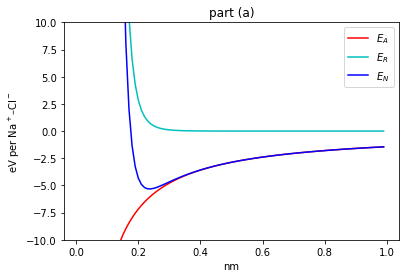

In [4]:
A = 1.436
B = (7.32*10**(-6))
n = 8
def E_A(r):
    return(-A/r)

def E_R(r):
    return(B/(r**n))

def E_N(r):
    return E_A(r) + E_R(r)

r = np.arange(0.01,1.0,0.01)


plt.plot(r, E_A(r),"r-",label = "$E_A$")
plt.plot(r, E_R(r),"c-",label = "$E_R$")
plt.plot(r, E_N(r),"b-",label = "$E_N$")

plt.ylim(-10.0,10.0)
plt.xlabel("nm")
plt.ylabel("eV per Na$^+$–Cl$^-$")
plt.title("part (a)")
plt.legend()
plt.show()

In [5]:
r_0 = (A/(n*B))**(1/(1-n))
print("r_0: {}".format(r_0))
E_0 = E_N(r_0)
print("E_0: {}".format(E_0))

r_0: 0.23600486025961642
E_0: -5.324042897327585


part (c):

(i) $r_0$ = 0.236nm

(ii) $E_0$ = -5.324 eV per Na$^+$–Cl$^-$

## Problem 2.23

Make a plot of bonding energy versus melting temperature for the metals listed in Table
2.3. Using this plot, approximate the bonding energy for molybdenum, which has a melting temperature of 2617°C.

y=0.2173x+115.3331


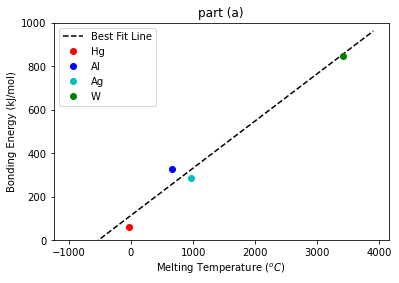

In [6]:
def func(x,m,b):
    return m*x + b


x_points = [-39,660,962,3414]
y_points = [62,350,285,850]

m, b = np.polyfit(x_points, y_points, 1)

t = np.arange(-1000,4000,100)

plt.plot(t,func(t,m,b),"k--",label = "Best Fit Line")

print("y={}x+{}".format(round(m,4),round(b,4)))



plt.plot(-39, 62,"ro",label = "Hg")
plt.plot(660, 330,"bo",label = "Al")
plt.plot(962, 285,"co",label = "Ag")
plt.plot(3414, 850,"go",label = "W")


plt.ylim(0,1000)
plt.xlabel("Melting Temperature $(^oC)$")
plt.ylabel("Bonding Energy (kJ/mol)")
plt.title("part (a)")
plt.legend()
plt.show()

In [7]:
molybdenum = m * 2617 + b
print(molybdenum)

683.9126301226461


Molybdenum will have a melting point of approximently $684^oC$

## Problem 2.25

Compute the %IC of the interatomic bond for each of the following compounds: MgO, GaP, CsF, CdS, and FeO

### Solution

Important equations:
1. $\%IC = \{1 - exp[-0.25(X_A-X_B)^2)]\} \times 100$

    Where $X_A$ is the electronegativity of the electronegative element and $X_B$ is the electronegativity of the electropositive element

In [8]:
X_Mg = 1.2
X_O = 3.5
X_Ga = 1.6
X_P = 2.1
X_Cs = 0.7
X_F = 4
X_Cd = 1.7
X_S = 2.5
X_Fe = 1.8

def IC(X_A,X_B):
    return round((1-np.exp(-(0.25)*(X_A - X_B)**2))*100,2)

print("MgO %IC = {}%".format(IC(X_Mg,X_O)))
print("GaP %IC = {}%".format(IC(X_Ga,X_P)))
print("CsF %IC = {}%".format(IC(X_Cs,X_F)))
print("CdS %IC = {}%".format(IC(X_Cd,X_S)))
print("FeO %IC = {}%".format(IC(X_Fe,X_O)))

MgO %IC = 73.35%
GaP %IC = 6.06%
CsF %IC = 93.43%
CdS %IC = 14.79%
FeO %IC = 51.45%


MgO %IC = 73.35%

GaP %IC = 6.06%

CsF %IC = 93.43%

CdS %IC = 14.79%

FeO %IC = 51.45%

## Problem 2.26

(a) Calculate %IC of the interatomic bonds for the intermetallic compound Al$_6$Mn. 

(b) On the basis of this result what type of interatomic bonding would you expect to be found in Al$_6$Mn?

### Solution

Important equations:
1. $\%IC = \{1 - exp[-0.25(X_A-X_B)^2)]\} \times 100$

    Where $X_A$ is the electronegativity of the electronegative element and $X_B$ is the electronegativity of the electropositive element

In [9]:
X_Al = 1.61
X_Mn = 1.55

def IC(X_A,X_B):
    return round((1-np.exp(-(0.25)*(X_A - X_B)**2))*100,2)

print("Al6Mn %IC = {}%".format(IC(X_Al,X_Mn)))

Al6Mn %IC = 0.09%


Al$_6$Mn %IC = 0.09%

Because of the low %IC, I'd exspect this bond to be either covalent or metallic. Since the elements bonding are metal, I'd exspect this to be a metallic bond.